In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [143]:
# Read the data from your Excel file
df = pd.read_csv("C:\\Users\\joshy\\Desktop\\sales.csv")

In [144]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column as it's no longer needed
df = df.drop(columns=['Date','Customer ID'])

In [145]:
print(df.head())

   Transaction ID  Gender  Age Product Category  Quantity  Price per Unit  \
0               1    Male   34           Beauty         3              50   
1               2  Female   26         Clothing         2             500   
2               3    Male   50      Electronics         1              30   
3               4    Male   37         Clothing         1             500   
4               5    Male   30           Beauty         2              50   

   Total Amount  Year  Month  Day  
0           150  2023     11   24  
1          1000  2023      2   27  
2            30  2023      1   13  
3           500  2023      5   21  
4           100  2023      5    6  


In [146]:
X = df.drop('Total Amount', axis=1)  #'Total Amount' is the target variable
y = df['Total Amount']

In [147]:
## Encode categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

In [148]:
# Define the number of folds for cross-validation
k_folds = 5

In [149]:
# Define a range of K values to try
k_values = [1, 3, 5, 7, 9]

In [150]:
mean_mse = []
mean_mae = []
for k in k_values:
    print(f"Processing K = {k}")
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Initialize lists to store performance metrics for each fold
    mse_scores = []
    mae_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        try:
            knn = KNeighborsRegressor(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            mse_scores.append(mean_squared_error(y_test, y_pred))
            mae_scores.append(mean_absolute_error(y_test, y_pred))

        except Exception as e:
            print(f"Error processing K = {k}, fold skipped. Error: {e}")
            break 
    if mse_scores and mae_scores:  # Ensure metrics were calculated for this K
        mean_mse.append(np.mean(mse_scores))
        mean_mae.append(np.mean(mae_scores))
    else:
        print(f"No metrics calculated for K = {k}")
        

Processing K = 1
Processing K = 3
Processing K = 5
Processing K = 7
Processing K = 9


In [151]:
y_pred = knn.predict(X_test)
mse_scores.append(mean_squared_error(y_test, y_pred))
mae_scores.append(mean_absolute_error(y_test, y_pred))

In [152]:
# Store the mean of the metrics for the current K
mean_mse.append(np.mean(mse_scores))
mean_mae.append(np.mean(mae_scores))

In [153]:
mean_mse = mean_mse[:len(k_values)]
mean_mae = mean_mae[:len(k_values)]

In [154]:
for i, k in enumerate(k_values):
    if i < len(mean_mse) and i < len(mean_mae):
        print(f"K = {k}: Mean MSE = {mean_mse[i]:.2f}, Mean MAE = {mean_mae[i]:.2f}")
    else:
        print(f"K = {k}: Metrics not calculated.")

K = 1: Mean MSE = 171441.33, Mean MAE = 231.88
K = 3: Mean MSE = 114531.09, Mean MAE = 194.94
K = 5: Mean MSE = 100324.04, Mean MAE = 188.23
K = 7: Mean MSE = 96303.22, Mean MAE = 184.26
K = 9: Mean MSE = 93560.16, Mean MAE = 183.34


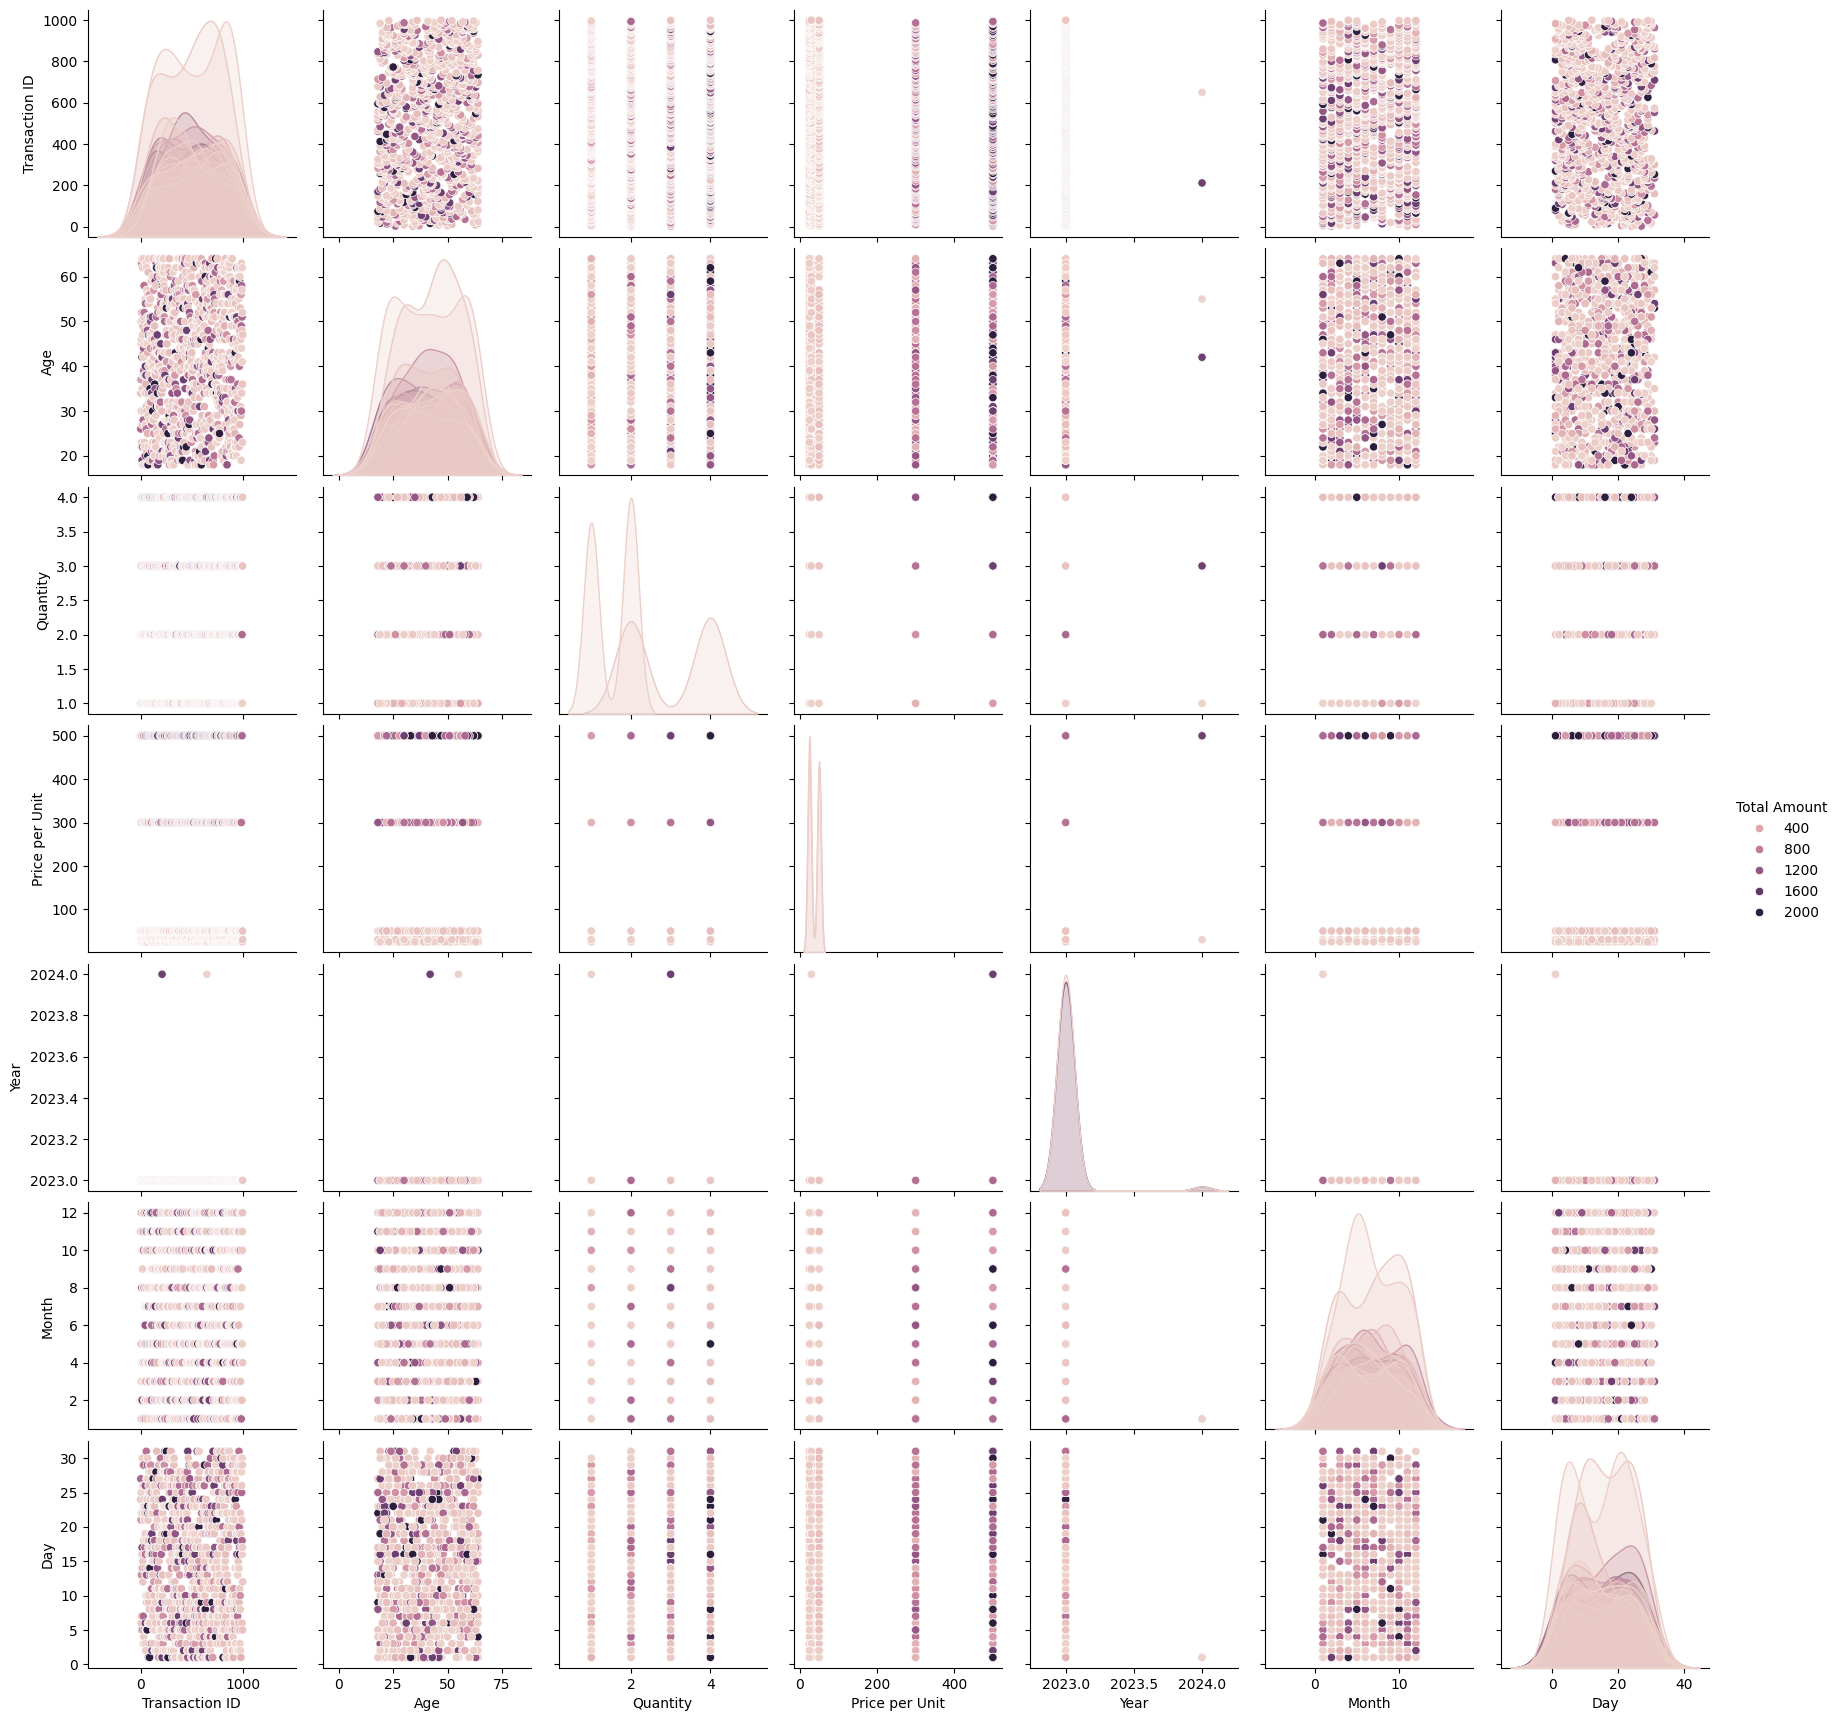

In [155]:
sns.pairplot(df, hue='Total Amount', diag_kind='kde')
plt.show()

In [156]:
print("Length of k_values:", len(k_values))
print("Length of mean_mse:", len(mean_mse))
print("Length of mean_mae:", len(mean_mae))


Length of k_values: 5
Length of mean_mse: 5
Length of mean_mae: 5


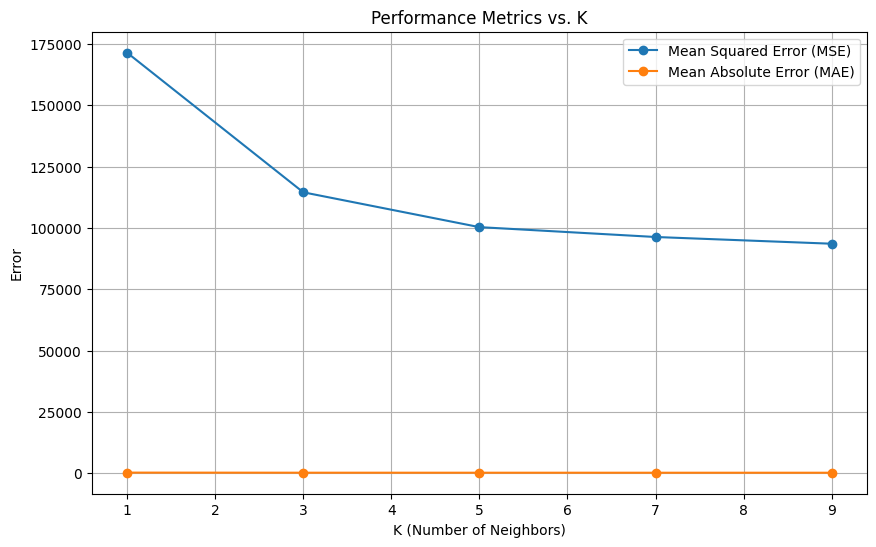

In [157]:
# Plot MSE and MAE
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_mse, label="Mean Squared Error (MSE)", marker='o')
plt.plot(k_values, mean_mae, label="Mean Absolute Error (MAE)", marker='o')

# Add labels, title, and legend
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Error")
plt.title("Performance Metrics vs. K")
plt.legend()
plt.grid()
plt.show()